In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import chi2
import scipy as sc
#from scipy.stats import norms
from numpy.lib.polynomial import poly1d
import math
from PIL import Image

##Effect of Observed Data and Bayesian Estimation. Replication of Bishop Patetrn Recognition book Figure 3.9


(9, 1)


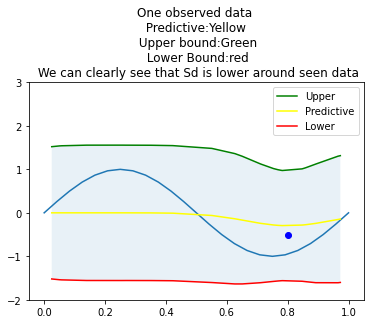

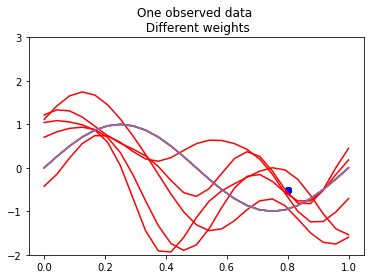

In [ ]:
#################################
###### One Observed data#########
#################################
#Please note some formulas might look different since My prior mean
# is zero and variance is Identity.

x=np.linspace(0,1,25)#x valeus generaed true data
y=np.sin(2 * np.pi * x) #y values generated true data
plt.plot(x,y)

xTrain= np.sort(np.random.random(1))
yTrain = np.sin(2 * np.pi * xTrain) + np.random.normal(0,1)   #noise has a mean of 0 and variance 1

mu0 = np.zeros((9,1)) #prior mean
sigma0 = np.identity(9) # prior cov matrix, its inverse is the same

Q = np.ones((1,9)) #phi matrix
mu=np.linspace(0,1,9) # mean of basis gaussian fucntions
s=0.1 # variance of basis functions

for j in range(0,9):#Basis function matrix
  Q[0][j]=np.exp(((xTrain - mu[j])**2)/(-2*(s**2)))

sigmaN= np.linalg.inv(sigma0 + 1*np.matmul(Q.T,Q))#Posterior variance
muN = np.matmul(sigmaN, (Q.T)*yTrain)#Posterior mean
print(muN.shape)

xPlot = np.sort(np.random.random((1,25))) # x values for plotting
yPlot = np.zeros((1,25))# y values for plotting
sigmaPlot= np.zeros((1,25)) # variance values for plotting

Qx = np.zeros((1,9))#Phi matrix for preditions
for i in range(0,25):
  for j in range(0,9):
    Qx[0][j]=np.exp(((xPlot[0][i] - mu[j])**2)/(-2*(s**2)))

  yPlot[0][i] = np.matmul(Qx,muN)
  sigmaPlot[0][i] = 1 + np.matmul(Qx,np.matmul(sigmaN,Qx.T))

upper= yPlot+np.sqrt(sigmaPlot)#upper bound of curve
lower = yPlot-np.sqrt(sigmaPlot)#lower bound of curve

plt.title("One observed data \n Predictive:Yellow \n Upper bound:Green\n Lower Bound:red\n We can clearly see that Sd is lower around seen data")

plt.ylim([-2,3])
plt.plot(xPlot.flatten(),upper.flatten(),c="green",label="Upper") # upperbound : + 1 Sd
plt.plot(xPlot.flatten(),yPlot.flatten(),c="yellow",label="Predictive") # predcitive
plt.fill_between(xPlot.flatten(),upper.flatten(),lower.flatten(),alpha=0.10)
plt.plot(xPlot.flatten(),lower.flatten(),c="red",label = "Lower") # lowerbound : -1 Sd
plt.scatter(xTrain,yTrain, c="blue") # known data in blue
plt.legend()

plt.show()
  
# to try different weights and see the curve
for i in range (0,5):
  w = np.random.multivariate_normal(muN.flatten(), sigmaN,1)
  xPlot = np.sort(x.reshape((1,25)))# x values for plotting
  yPlot = np.zeros((1,25))# y values for plotting
  sigmaPlot= np.zeros((1,25))# variance values for plotting
  Qx = np.zeros((1,9))
  for i in range(0,25):
    for j in range(0,9):
      Qx[0][j]=np.exp(((xPlot[0][i] - mu[j])**2)/(-2*(s**2)))

    yPlot[0][i] = np.matmul(Qx,w.T)
    sigmaPlot[0][i] = 1 + np.matmul(Qx,np.matmul(sigmaN,Qx.T))

  upper= yPlot+np.sqrt(sigmaPlot)
  lower = yPlot-np.sqrt(sigmaPlot)

  plt.title("One observed data \n Different weights")
  plt.ylim([-2,3])
  
  plt.plot(xPlot.flatten(),yPlot.flatten(),c="red") # predcitive
 
  plt.scatter(xTrain,yTrain, c="blue") # known data in blue
  plt.plot(x,y)

plt.show()




(9, 1)


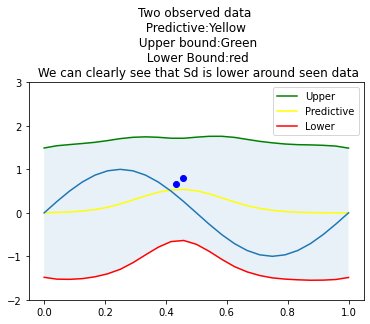

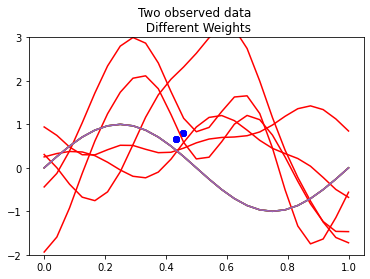

In [ ]:
#################################
###### Two Observed data#########
#################################

x=np.linspace(0,1,25)#x valeus generaed true data
y=np.sin(2 * np.pi * x) #y values generated true data


xTrain= np.sort(np.random.random(2))
yTrain = np.sort(np.sin(2 * np.pi * xTrain) + np.random.normal(0,1))   #noise has a mean of 0 and variance 1

mu0 = np.zeros((9,1)) #prior mean
sigma0 = np.identity(9) # prior cov matrix, its inverse is the same

Q = np.ones((2,9)) #phi matrix
mu=np.linspace(0,1,9) # mean of basis gaussian fucntions
s=0.1 # variance of basis functions

for i in range(0,2):
  for j in range(0,9):
    Q[i][j]=np.exp(((xTrain[i] - mu[j])**2)/(-2*(s**2)))

sigmaN= np.linalg.inv(sigma0 + 1*np.matmul(Q.T,Q))#Posterior variance
muN = np.matmul(sigmaN, np.matmul((Q.T),yTrain.reshape(2,1)))#Posterior mean
print(muN.shape)

xPlot = np.sort(x.reshape((1,25)))# x values for plotting
yPlot = np.zeros((1,25))# y values for plotting
sigmaPlot= np.zeros((1,25))# variance values for plotting
Qx = np.zeros((1,9))
for i in range(0,25):
  for j in range(0,9):
    Qx[0][j]=np.exp(((xPlot[0][i] - mu[j])**2)/(-2*(s**2)))

  yPlot[0][i] = np.matmul(Qx,muN)
  sigmaPlot[0][i] = 1 + np.matmul(Qx,np.matmul(sigmaN,Qx.T))

upper= yPlot+np.sqrt(sigmaPlot)
lower = yPlot-np.sqrt(sigmaPlot)

plt.title("Two observed data \n Predictive:Yellow \n Upper bound:Green\n Lower Bound:red\n We can clearly see that Sd is lower around seen data")
plt.ylim([-2,3])
plt.plot(xPlot.flatten(),upper.flatten(),c="green",label="Upper") # upperbound : + 1 Sd
plt.plot(xPlot.flatten(),yPlot.flatten(),c="yellow",label="Predictive") # predcitive
plt.fill_between(xPlot.flatten(),upper.flatten(),lower.flatten(),alpha=0.10)
plt.plot(xPlot.flatten(),lower.flatten(),c="red",label = "Lower") # lowerbound : -1 Sd
plt.scatter(xTrain,yTrain, c="blue") # known data in blue
plt.legend()
plt.plot(x,y)

plt.show()
  
for i in range (0,5):
  w = np.random.multivariate_normal(muN.flatten(), sigmaN,1)
  xPlot = np.sort(x.reshape((1,25)))# x values for plotting
  yPlot = np.zeros((1,25))# y values for plotting
  sigmaPlot= np.zeros((1,25))# variance values for plotting
  Qx = np.zeros((1,9))
  for i in range(0,25):
    for j in range(0,9):
      Qx[0][j]=np.exp(((xPlot[0][i] - mu[j])**2)/(-2*(s**2)))

    yPlot[0][i] = np.matmul(Qx,w.T)
    sigmaPlot[0][i] = 1 + np.matmul(Qx,np.matmul(sigmaN,Qx.T))

  upper= yPlot+np.sqrt(sigmaPlot)
  lower = yPlot-np.sqrt(sigmaPlot)

  plt.title("Two observed data \n Different Weights")
  plt.ylim([-2,3])
  
  plt.plot(xPlot.flatten(),yPlot.flatten(),c="red") # predcitive
 
  plt.scatter(xTrain,yTrain, c="blue") # known data in blue
  plt.plot(x,y)

plt.show()



(9, 1)


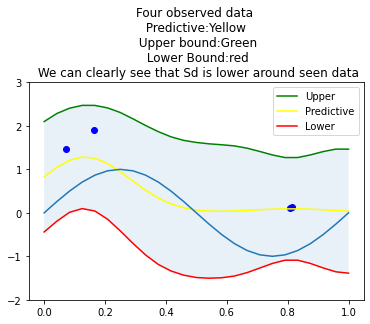

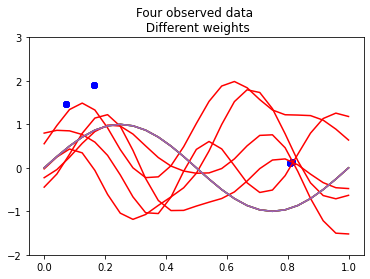

In [ ]:
#################################
###### Four Observed data#########
#################################

x=np.linspace(0,1,25)#x valeus generaed true data
y=np.sin(2 * np.pi * x) #y values generated true data


xTrain= np.sort(np.array(np.random.random(4)))
yTrain = np.sin(2 * np.pi * xTrain) + np.random.normal(0,1)   #noise has a mean of 0 and variance 1

mu0 = np.zeros((9,1)) #prior mean
sigma0 = np.identity(9) # prior cov matrix, its inverse is the same

Q = np.ones((4,9)) #phi matrix
mu=np.linspace(0,1,9) # mean of basis gaussian fucntions
s=0.1 # variance of basis functions

for i in range(0,4):
  for j in range(0,9):
    Q[i][j]=np.exp(((xTrain[i] - mu[j])**2)/(-2*(s**2)))

sigmaN= np.linalg.inv(sigma0 + 1*np.matmul(Q.T,Q))#Posterior variance
muN = np.matmul(sigmaN, np.matmul((Q.T),yTrain.reshape(4,1)))#Posterior mean
print(muN.shape)

xPlot = np.sort(x.reshape((1,25)))# x values for plotting
yPlot = np.zeros((1,25)) # y values for plotting
sigmaPlot= np.zeros((1,25)) # variance values for plotting
Qx = np.zeros((1,9))
for i in range(0,25):
  for j in range(0,9):
    Qx[0][j]=np.exp(((xPlot[0][i] - mu[j])**2)/(-2*(s**2)))

  yPlot[0][i] = np.matmul(Qx,muN)
  sigmaPlot[0][i] = 1 + np.matmul(Qx,np.matmul(sigmaN,Qx.T))

upper= yPlot+np.sqrt(sigmaPlot)
lower = yPlot-np.sqrt(sigmaPlot)

plt.title("Four observed data \n Predictive:Yellow \n Upper bound:Green\n Lower Bound:red\n We can clearly see that Sd is lower around seen data")
plt.ylim([-2,3])
plt.plot(xPlot.flatten(),upper.flatten(),c="green",label="Upper") # upperbound : + 1 Sd
plt.plot(xPlot.flatten(),yPlot.flatten(),c="yellow",label="Predictive") # predcitive
plt.plot(xPlot.flatten(),lower.flatten(),c="red",label = "Lower") # lowerbound : -1 Sd
plt.fill_between(xPlot.flatten(),upper.flatten(),lower.flatten(),alpha=0.10)
plt.scatter(xTrain,yTrain, c="blue") # known data in blue
plt.plot(x,y)
plt.legend()
plt.show()
  

for i in range (0,5):
  w = np.random.multivariate_normal(muN.flatten(), sigmaN,1)
  xPlot = np.sort(x.reshape((1,25)))# x values for plotting
  yPlot = np.zeros((1,25))# y values for plotting
  sigmaPlot= np.zeros((1,25))# variance values for plotting
  Qx = np.zeros((1,9))
  for i in range(0,25):
    for j in range(0,9):
      Qx[0][j]=np.exp(((xPlot[0][i] - mu[j])**2)/(-2*(s**2)))

    yPlot[0][i] = np.matmul(Qx,w.T)
    sigmaPlot[0][i] = 1 + np.matmul(Qx,np.matmul(sigmaN,Qx.T))

  upper= yPlot+np.sqrt(sigmaPlot)
  lower = yPlot-np.sqrt(sigmaPlot)

  plt.title("Four observed data \n Different weights")
  plt.ylim([-2,3])
  
  plt.plot(xPlot.flatten(),yPlot.flatten(),c="red") # predcitive
 
  plt.scatter(xTrain,yTrain, c="blue") # known data in blue
  plt.plot(x,y)

plt.show()


(9, 1)


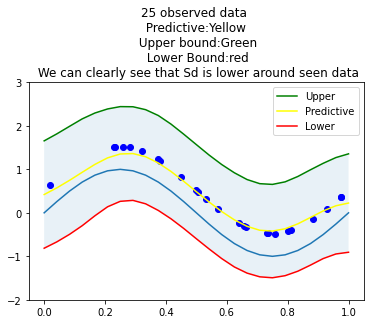

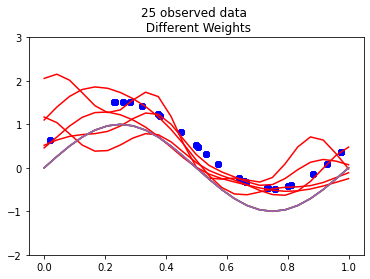

In [ ]:
#################################
###### 25 Observed data#########
#################################

x=np.linspace(0,1,25)#x valeus generaed true data
y=np.sin(2 * np.pi * x) #y values generated true data


xTrain= np.sort(np.random.random(25))
yTrain = np.sin(2 * np.pi * xTrain) + np.random.normal(0,1)   #noise has a mean of 0 and variance 1

mu0 = np.zeros((9,1)) #prior mean
sigma0 = np.identity(9) # prior cov matrix, its inverse is the same

Q = np.ones((25,9)) #phi matrix
mu=np.linspace(0,1,9) # mean of basis gaussian fucntions
s=0.1 # variance of basis functions

for i in range(0,25):
  for j in range(0,9):
    Q[i][j]=np.exp(((xTrain[i] - mu[j])**2)/(-2*(s**2)))

sigmaN= np.linalg.inv(sigma0 + 1*np.matmul(Q.T,Q))#Posterior variance
muN = np.matmul(sigmaN, np.matmul((Q.T),yTrain.reshape(25,1))) #Posterior Mean
print(muN.shape)

xPlot = np.sort(x.reshape((1,25))) # xvalues for plotting
yPlot = np.zeros((1,25)) # y values for plotting
sigmaPlot= np.zeros((1,25)) # variance values for plotting
Qx = np.zeros((1,9)) # Qx used for doing the predictive curve
for i in range(0,25):
  for j in range(0,9):
    Qx[0][j]=np.exp(((xPlot[0][i] - mu[j])**2)/(-2*(s**2)))

  yPlot[0][i] = np.matmul(Qx,muN)
  sigmaPlot[0][i] = 1 + np.matmul(Qx,np.matmul(sigmaN,Qx.T))

upper= yPlot+np.sqrt(sigmaPlot)
lower = yPlot-np.sqrt(sigmaPlot)

plt.title("25 observed data \n Predictive:Yellow \n Upper bound:Green\n Lower Bound:red\n We can clearly see that Sd is lower around seen data")
plt.ylim([-2,3])
plt.plot(xPlot.flatten(),upper.flatten(),c="green",label="Upper") # upperbound : + 1 Sd
plt.plot(xPlot.flatten(),yPlot.flatten(),c="yellow",label="Predictive") # predcitive
plt.plot(xPlot.flatten(),lower.flatten(),c="red",label = "Lower") # lowerbound : -1 Sd
plt.fill_between(xPlot.flatten(),upper.flatten(),lower.flatten(),alpha=0.10)
plt.scatter(xTrain,yTrain, c="blue") # known data in blue
plt.plot(x,y)
plt.legend()
plt.show()
  
for i in range (0,5):
  w = np.random.multivariate_normal(muN.flatten(), sigmaN,1)
  xPlot = np.sort(x.reshape((1,25)))# x values for plotting
  yPlot = np.zeros((1,25))# y values for plotting
  sigmaPlot= np.zeros((1,25))# variance values for plotting
  Qx = np.zeros((1,9))
  for i in range(0,25):
    for j in range(0,9):
      Qx[0][j]=np.exp(((xPlot[0][i] - mu[j])**2)/(-2*(s**2)))

    yPlot[0][i] = np.matmul(Qx,w.T)
    sigmaPlot[0][i] = 1 + np.matmul(Qx,np.matmul(sigmaN,Qx.T))

  upper= yPlot+np.sqrt(sigmaPlot)
  lower = yPlot-np.sqrt(sigmaPlot)

  plt.title("25 observed data \n Different Weights")
  plt.ylim([-2,3])
  
  plt.plot(xPlot.flatten(),yPlot.flatten(),c="red") # predcitive
 
  plt.scatter(xTrain,yTrain, c="blue") # known data in blue
  plt.plot(x,y)

plt.show()



These results show that, inclusion of seen data, constraints the 
curve in a way to pass through those lines and also reduce the error around those points. This is because the prior distribution is corrected by the liklihood distribution in the bayes formula, which this method is based on.